# OLA - Ensemble Learning


**Problem Statement**

The goal is to predict driver attrition based on a set of attributes. We have access to monthly data for a segment of drivers from 2019 and 2020. The attributes include:

- **Demographics**: City, age, gender, etc.
- **Tenure Information**: Joining date, last date (if applicable).
- **Performance Data**: Quarterly rating, monthly business acquired, grade, income.

The task is to develop a model that can accurately predict whether a driver will leave the company or not, utilizing these attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
!gdown 1Y23v_HjKhQtLbNpjsqNjbdHuKXmd0tMO

Downloading...
From: https://drive.google.com/uc?id=1Y23v_HjKhQtLbNpjsqNjbdHuKXmd0tMO
To: /content/ola_driver_.csv
100% 1.13M/1.13M [00:00<00:00, 30.4MB/s]


In [3]:
df = pd.read_csv('ola_driver_.csv')

In [4]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
df.shape

(19104, 14)

In [6]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


### **Column Profiling**

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver  Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

Dropping the column Unnamed : 0 since its a index column and is irrelevant  

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Checking for Null values

In [10]:
100*df.isnull().sum() / len(df)

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


* In Last working date column we have 91% missing values assuming that columns where values are missung the driver have not left the company we'll fill it with 0
* We'll impute the values for age and gender as well

### Feature Engineering

In [11]:
df['LastWorkingDate'].fillna(value=0, inplace=True)
df['LastWorkingDate'] = df['LastWorkingDate'].apply(lambda x: 0 if x == 0 else 1)

In [12]:
df['r_month'] = df['MMM-YY'].apply(lambda x: int(str(x).split('/')[0]) )
df['r_day'] = df['MMM-YY'].apply(lambda x: int(str(x).split('/')[1]) )
df['r_year'] = df['MMM-YY'].apply(lambda x: int(str(x).split('/')[2]) )

df['city'] = df['City'].apply(lambda x: str(x)[1:] )

df['j_month'] = df['Dateofjoining'].apply(lambda x: int(str(x).split('/')[0]) )
df['j_day'] = df['Dateofjoining'].apply(lambda x: int(str(x).split('/')[1]) )
df['j_year'] = df['Dateofjoining'].apply(lambda x: int(str(x).split('/')[2]) )

In [13]:
# keeping the original dataset for refernce
df_copy = df.copy()
df.drop(['MMM-YY', 'City', 'Dateofjoining'], axis=1, inplace=True)

#### KNN Imputation
Knn Imputation to fill the missing values

In [14]:
from sklearn.impute import KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=2)
transformed = imputer.fit_transform(df)
df2 = pd.DataFrame(transformed)

In [16]:
df2.columns = df.columns

In [17]:
df2.head()

,Driver_ID,Age,Gender,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,r_month,r_day,r_year,city,j_month,j_day,j_year
0,1.0,28.0,0.0,2.0,57387.0,0.0,1.0,1.0,2381060.0,2.0,1.0,1.0,19.0,23.0,24.0,12.0,18.0
1,1.0,28.0,0.0,2.0,57387.0,0.0,1.0,1.0,-665480.0,2.0,2.0,1.0,19.0,23.0,24.0,12.0,18.0
2,1.0,28.0,0.0,2.0,57387.0,1.0,1.0,1.0,0.0,2.0,3.0,1.0,19.0,23.0,24.0,12.0,18.0
3,2.0,31.0,0.0,2.0,67016.0,0.0,2.0,2.0,0.0,1.0,11.0,1.0,20.0,7.0,11.0,6.0,20.0
4,2.0,31.0,0.0,2.0,67016.0,0.0,2.0,2.0,0.0,1.0,12.0,1.0,20.0,7.0,11.0,6.0,20.0


In [18]:
df2.isnull().sum()

,0
Driver_ID,0
Age,0
Gender,0
Education_Level,0
Income,0
LastWorkingDate,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [19]:
df2['r_day'] = df2['r_day'].astype(int)
df2['r_month'] = df2['r_month'].astype(int)
df2['r_year'] = df2['r_year'].astype(int)
df2['j_day'] = df2['j_day'].astype(int)
df2['j_month'] = df2['j_month'].astype(int)
df2['j_year'] = df2['j_year'].astype(int)

In [20]:
df2['Reporting Date'] = df2['r_month'].astype(str) + '/' + df2['r_day'].astype(str) + '/' + df2['r_year'].astype(str)
df2['Dateofjoining'] = df2['j_month'].astype(str) + '/' + df2['j_day'].astype(str) + '/' + df2['j_year'].astype(str)

In [21]:
df2.drop(['r_month', 'r_day', 'r_year', 'j_month', 'j_day', 'j_year'], axis=1, inplace=True)

Converting the dates column from object to datetime format

In [22]:
df2['Reporting Date'] = pd.to_datetime(df2['Reporting Date'])
df2['Dateofjoining'] = pd.to_datetime(df2['Dateofjoining'])

Creating a quaterly colum for the driver reporting date

In [23]:
df2['Quarter'] = df2['Reporting Date'].dt.to_period('Q')

In [24]:
# Caluclating the TBV quaterly for each driver ID
quaterly_tbv = df2.groupby(['Driver_ID', 'Quarter'])['Total Business Value'].sum().reset_index()
print(quaterly_tbv)

      Driver_ID Quarter  Total Business Value
0           1.0  2019Q1             1715580.0
1           2.0  2020Q4                   0.0
2           4.0  2019Q4                   0.0
3           4.0  2020Q1              350000.0
4           4.0  2020Q2                   0.0
...         ...     ...                   ...
7352     2787.0  2019Q1              977830.0
7353     2787.0  2019Q2                   0.0
7354     2788.0  2020Q2                   0.0
7355     2788.0  2020Q3             1686340.0
7356     2788.0  2020Q4              611900.0

[7357 rows x 3 columns]


In [25]:
# Categorizing the TBV to get the count of drivers
df2['Positive_TBV'] = (df2['Total Business Value'] > 0).astype(int)
df2['Negative_TBV'] = (df2['Total Business Value'] < 0).astype(int)
df2['Zero_TBV']=(df2['Total Business Value'] == 0).astype(int)

In [26]:
# There are multiple entries for the same driver id so we'll group by the driver id and aggregate the columns
df_driver = df2.groupby('Driver_ID').agg({
    'Reporting Date': 'first',
    'Age': 'max',
    'Gender': 'first',
    'city': 'first',
    'Education_Level': 'max',
    'Income': np.mean,
    'Dateofjoining': 'first',
    'LastWorkingDate': 'max',
    'Joining Designation': 'max',
    'Grade': 'max',
    'Total Business Value': 'sum',
    'Positive_TBV': 'sum',
    'Negative_TBV': 'sum',
    'Zero_TBV': 'sum',
    'Quarterly Rating': np.mean
}).reset_index()

In [27]:
df_driver.head()

,Driver_ID,Reporting Date,Age,Gender,city,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Positive_TBV,Negative_TBV,Zero_TBV,Quarterly Rating
0,1.0,2019-01-01,28.0,0.0,23.0,2.0,57387.0,2018-12-24,1.0,1.0,1.0,1715580.0,1,1,1,2.0
1,2.0,2020-11-01,31.0,0.0,7.0,2.0,67016.0,2020-11-06,0.0,2.0,2.0,0.0,0,0,2,1.0
2,4.0,2019-12-01,43.0,0.0,13.0,2.0,65603.0,2019-12-07,1.0,2.0,2.0,350000.0,1,0,4,1.0
3,5.0,2019-01-01,29.0,0.0,9.0,0.0,46368.0,2019-01-09,1.0,1.0,1.0,120360.0,1,0,2,1.0
4,6.0,2020-08-01,31.0,1.0,11.0,1.0,78728.0,2020-07-31,0.0,3.0,3.0,1265000.0,1,0,4,1.6


In [28]:
# Check the presence and distribution of different Positive TBV's
df_driver['Positive_TBV'].value_counts()

,count
Positive_TBV,
0,717
1,289
2,226
3,212
4,120
5,96
6,90
24,86
7,67


In [29]:
# Check the presence and distribution of different Negative TBVs
df_driver['Negative_TBV'].value_counts()

,count
Negative_TBV,
0,2245
1,125
2,9
3,2


In [30]:
# Check the presence and distribution of different Zero TBVs
df_driver['Zero_TBV'].value_counts()

,count
Zero_TBV,
2,533
1,520
3,474
4,350
5,210
0,148
6,70
7,39
8,15


In [31]:
# Duplicates check
df_driver.duplicated().sum()

0

In [32]:
# Extracting the year of joining from date of joining
df_driver['Year_of_joining'] = df_driver['Dateofjoining'].dt.year

Creating feature for increased income

In [33]:
# Calculate the count of drivers who's Income has increased
def inc_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] > inc.iloc[-2])
    else:
        return 0

Increased_income = df.groupby("Driver_ID")["Income"].apply(inc_income).reset_index(name='Increased_income')

df_driver = pd.merge(left=df_driver,
                right=Increased_income,
                on="Driver_ID",
                how="outer")

df_driver['Increased_income'].value_counts()

,count
Increased_income,
0,2370
1,11


Creating feature for increased grade

In [34]:
# Calculate the count of drivers who's grade has increased
def inc_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]>grd.iloc[-2])
  else:
    return 0

Increased_grade = df.groupby("Driver_ID")["Grade"].apply(inc_grade).reset_index(name='Increased_grade')

df_driver = pd.merge(left=df_driver,
                right=Increased_grade,
                on="Driver_ID",
                how="outer")

df_driver['Increased_grade'].value_counts()

,count
Increased_grade,
0,2370
1,11


Creating feature of Quaterly rating increased for a driver / not

In [35]:
#Calculate the count of drivers who's quaterly rating has increased
def qrt_rat_inc(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] > rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_inc).reset_index(name='Quarterly_Rating_increased')

df_driver = pd.merge(left=df_driver,
                right=Quarterly_Rating_increased,
                on="Driver_ID",
                how="outer")

df_driver['Quarterly_Rating_increased'].value_counts()

,count
Quarterly_Rating_increased,
0,2365
1,16


In [36]:
#Calculate the count of drivers who's quaterly rating has decreased
def qrt_rat_dec(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] < rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_decreased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_dec).reset_index(name='Quarterly_Rating_decreased')

df_driver = pd.merge(left=df_driver,
                right=Quarterly_Rating_decreased,
                on="Driver_ID",
                how="outer")

df_driver['Quarterly_Rating_decreased'].value_counts()

,count
Quarterly_Rating_decreased,
0,2251
1,130


In [37]:
# Calculate Total Business Value to Income ratio
df_driver['TBV2Inc']=df_driver['Total Business Value']//df_driver['Income']

Creating the **target** column

In [38]:
df_driver['target']=df_driver['LastWorkingDate'].astype(int)

In [39]:
df_driver.head()

,Driver_ID,Reporting Date,Age,Gender,city,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Negative_TBV,Zero_TBV,Quarterly Rating,Year_of_joining,Increased_income,Increased_grade,Quarterly_Rating_increased,Quarterly_Rating_decreased,TBV2Inc,target
0,1.0,2019-01-01,28.0,0.0,23.0,2.0,57387.0,2018-12-24,1.0,1.0,...,1,1,2.0,2018,0,0,0,0,29.0,1
1,2.0,2020-11-01,31.0,0.0,7.0,2.0,67016.0,2020-11-06,0.0,2.0,...,0,2,1.0,2020,0,0,0,0,0.0,0
2,4.0,2019-12-01,43.0,0.0,13.0,2.0,65603.0,2019-12-07,1.0,2.0,...,0,4,1.0,2019,0,0,0,0,5.0,1
3,5.0,2019-01-01,29.0,0.0,9.0,0.0,46368.0,2019-01-09,1.0,1.0,...,0,2,1.0,2019,0,0,0,0,2.0,1
4,6.0,2020-08-01,31.0,1.0,11.0,1.0,78728.0,2020-07-31,0.0,3.0,...,0,4,1.6,2020,0,0,0,0,16.0,0


**Statistical Analysis**

In [40]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   float64       
 1   Reporting Date              2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   city                        2381 non-null   float64       
 5   Education_Level             2381 non-null   float64       
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             2381 non-null   float64       
 9   Joining Designation         2381 non-null   float64       
 10  Grade                       2381 non-null   float64       
 11  Total Business Value        2381 non-null   float64     

In [41]:
df_driver.describe()

,Driver_ID,Reporting Date,Age,Gender,city,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Negative_TBV,Zero_TBV,Quarterly Rating,Year_of_joining,Increased_income,Increased_grade,Quarterly_Rating_increased,Quarterly_Rating_decreased,TBV2Inc,target
count,2381.000000,2381,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381,2381.000000,2381.000000,...,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,2019-08-30 15:12:37.496849920,33.752205,0.410962,15.335573,1.00756,59232.460484,2019-02-08 07:14:50.550189056,0.678706,1.820244,...,0.062579,2.729525,1.566304,2018.536329,0.004620,0.004620,0.006720,0.054599,71.417472,0.678706
min,1.000000,2019-01-01 00:00:00,21.000000,0.000000,1.000000,0.00000,10747.000000,2013-04-01 00:00:00,0.000000,1.000000,...,0.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,0.000000
25%,695.000000,2019-01-01 00:00:00,30.000000,0.000000,8.000000,0.00000,39104.000000,2018-06-29 00:00:00,0.000000,1.000000,...,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1400.000000,2019-07-01 00:00:00,33.000000,0.000000,15.000000,1.00000,55285.000000,2019-07-21 00:00:00,1.000000,2.000000,...,0.000000,2.000000,1.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000
75%,2100.000000,2020-05-01 00:00:00,37.000000,1.000000,22.000000,2.00000,75835.000000,2020-05-02 00:00:00,1.000000,2.000000,...,0.000000,4.000000,2.000000,2020.000000,0.000000,0.000000,0.000000,0.000000,79.000000,1.000000
max,2788.000000,2020-12-01 00:00:00,58.000000,1.000000,29.000000,2.00000,188418.000000,2020-12-28 00:00:00,1.000000,5.000000,...,3.000000,15.000000,4.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1058.000000,1.000000
std,806.161628,NaN,5.952783,0.491791,8.371843,0.81629,28298.214012,NaN,0.467071,0.841433,...,0.267006,1.814717,0.719652,1.609597,0.067827,0.067827,0.081716,0.227243,125.767775,0.467071


In [42]:
df_driver['target'].value_counts()

,count
target,
1,1616
0,765


## **Data Visualization**

### Driver Retention vs. Turnover

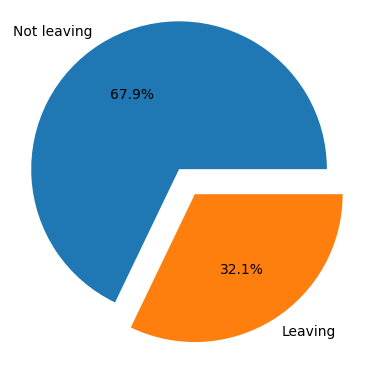

In [43]:
plt.pie(df_driver['LastWorkingDate'].value_counts(), labels= ['Not leaving', 'Leaving'], explode = [0.2, 0], autopct='%1.1f%%')
plt.show()

### % Attrition based on Grade

Grade
1.0    0.80
2.0    0.70
3.0    0.54
4.0    0.51
5.0    0.54
Name: target, dtype: float64


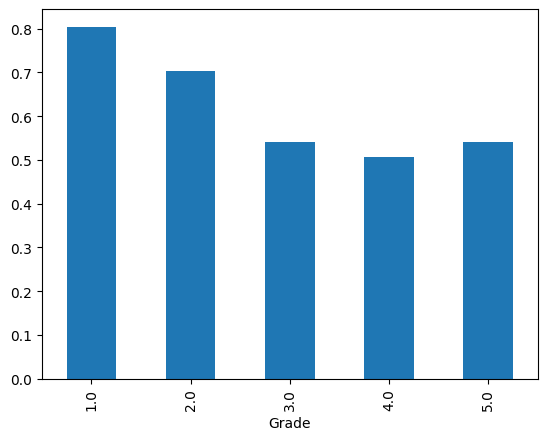

In [44]:
df_driver.groupby('Grade')['target'].mean().plot(kind='bar')
print(round((df_driver.groupby('Grade')['target'].mean()),2))

* Drivers attrition with grade 1 and 2 is more when compared to the other grades

### % Attrition based on Education Level

Education_Level
0.0    0.69
1.0    0.66
2.0    0.68
Name: target, dtype: float64


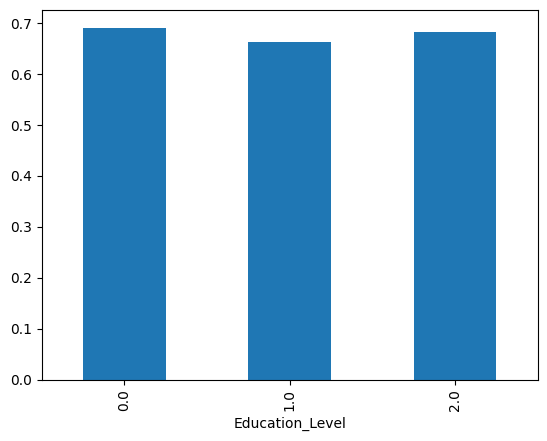

In [45]:
df_driver.groupby('Education_Level')['target'].mean().plot(kind='bar')
print(round((df_driver.groupby('Education_Level')['target'].mean()),2))

* There is no significant difference in attrition of driver with respect to the education level

### No of drivers leaving based on Total Business Value

target
0    9620626.31
1    2203745.76
Name: Total Business Value, dtype: float64


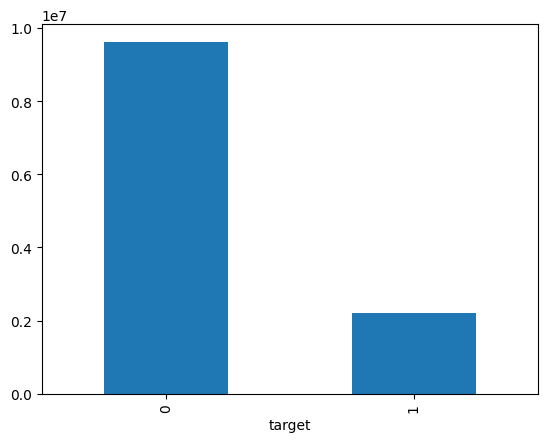

In [46]:
df_driver.groupby('target')['Total Business Value'].mean().plot(kind='bar')
print(round((df_driver.groupby('target')['Total Business Value'].mean()),2))

 * From the above bar plot we can say that drivers with  total  business value of 2203K have left the company

In [47]:
df_driver[df_driver['Quarterly_Rating_decreased']==1]

,Driver_ID,Reporting Date,Age,Gender,city,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Negative_TBV,Zero_TBV,Quarterly Rating,Year_of_joining,Increased_income,Increased_grade,Quarterly_Rating_increased,Quarterly_Rating_decreased,TBV2Inc,target
15,22.0,2019-01-01,41.0,0.0,10.0,2.0,31224.0,2018-05-25,1.0,1.0,...,0,1,2.875000,2018,0,0,0,1,241.0,1
16,24.0,2019-01-01,36.0,0.0,24.0,2.0,76308.0,2018-05-25,1.0,1.0,...,0,0,2.300000,2018,0,0,0,1,53.0,1
43,57.0,2019-01-01,38.0,1.0,1.0,1.0,84318.0,2017-07-26,1.0,1.0,...,1,1,3.052632,2017,0,0,0,1,270.0,1
94,113.0,2019-06-01,42.0,1.0,10.0,0.0,47160.0,2019-06-23,1.0,1.0,...,1,3,1.600000,2019,0,0,0,1,14.0,1
146,172.0,2019-01-01,41.0,1.0,6.0,2.0,101395.0,2017-11-07,1.0,2.0,...,0,2,2.714286,2017,0,0,0,1,52.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2738.0,2019-01-01,35.5,0.0,17.0,0.0,23068.0,2018-09-08,1.0,1.0,...,0,1,2.846154,2018,0,0,0,1,257.0,1
2356,2759.0,2019-01-01,29.0,0.0,17.0,1.0,82260.0,2018-08-24,1.0,2.0,...,0,1,2.500000,2018,0,0,0,1,61.0,1
2359,2762.0,2019-01-01,40.0,0.0,1.0,1.0,52682.0,2018-05-05,1.0,2.0,...,0,1,2.500000,2018,0,0,0,1,77.0,1
2368,2773.0,2019-06-01,36.0,0.0,19.0,0.0,35607.0,2019-06-21,1.0,1.0,...,0,6,1.375000,2019,0,0,0,1,15.0,1


* Drivers who's quarterly rating has decreased have left the company

### Univariate Analysis

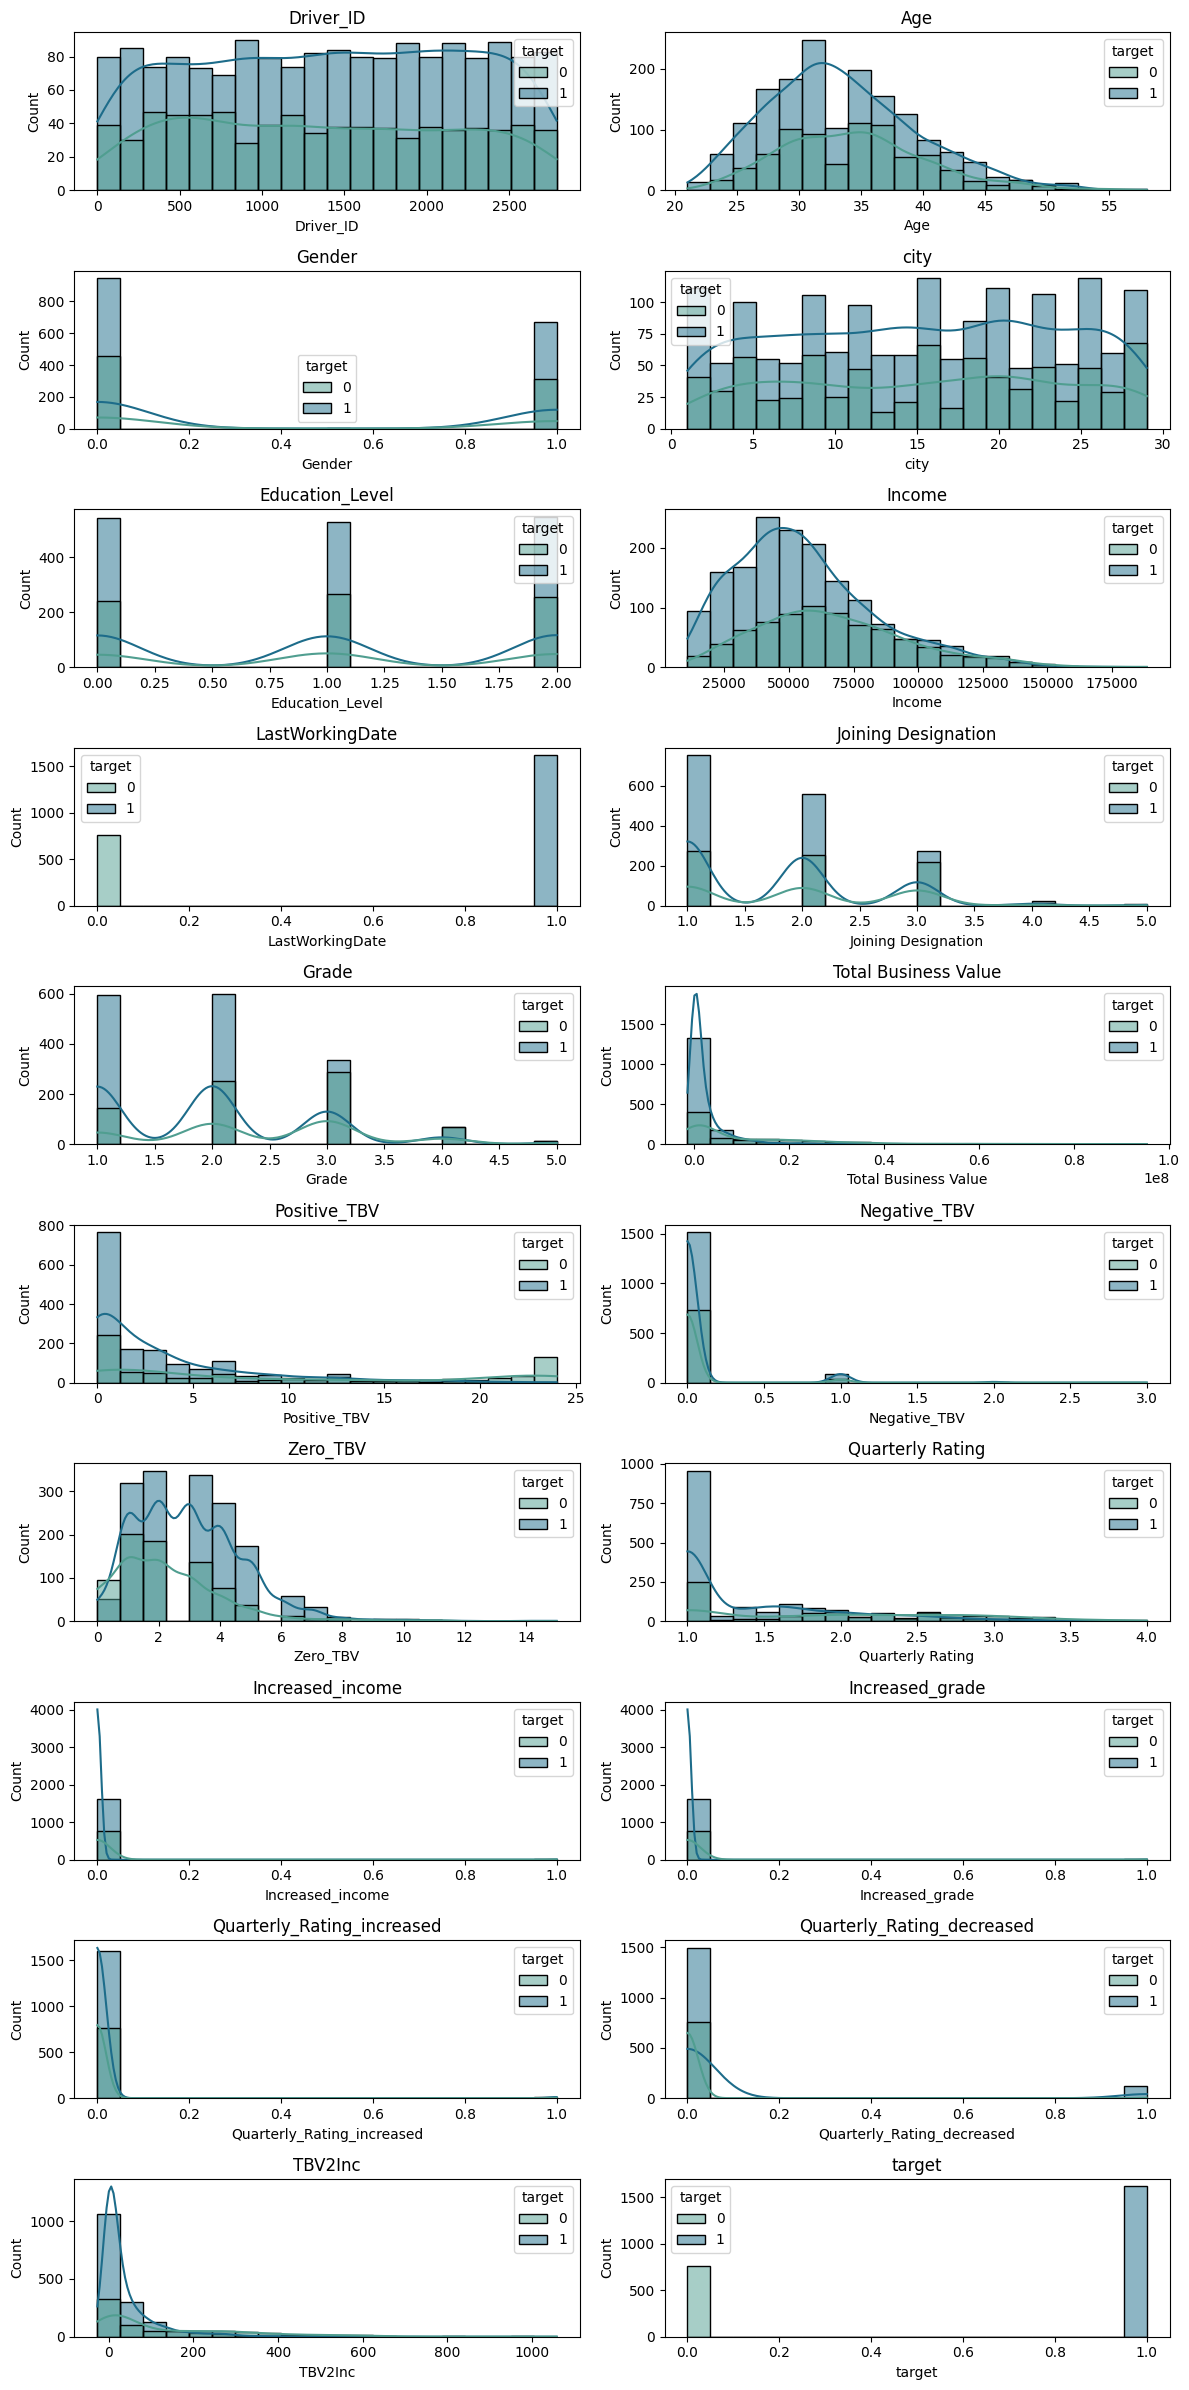

In [48]:
cols = df_driver.select_dtypes(include=['int64', 'float64']).columns
# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(cols) + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 24))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms
for index, col in enumerate(cols):
    sns.histplot(data=df_driver, x=col, bins=20, ax=axes[index], kde=True, hue='target', palette='crest')
    axes[index].set_title(col)

plt.tight_layout()
plt.show()

#### City vs Target

<Axes: xlabel='city', ylabel='count'>

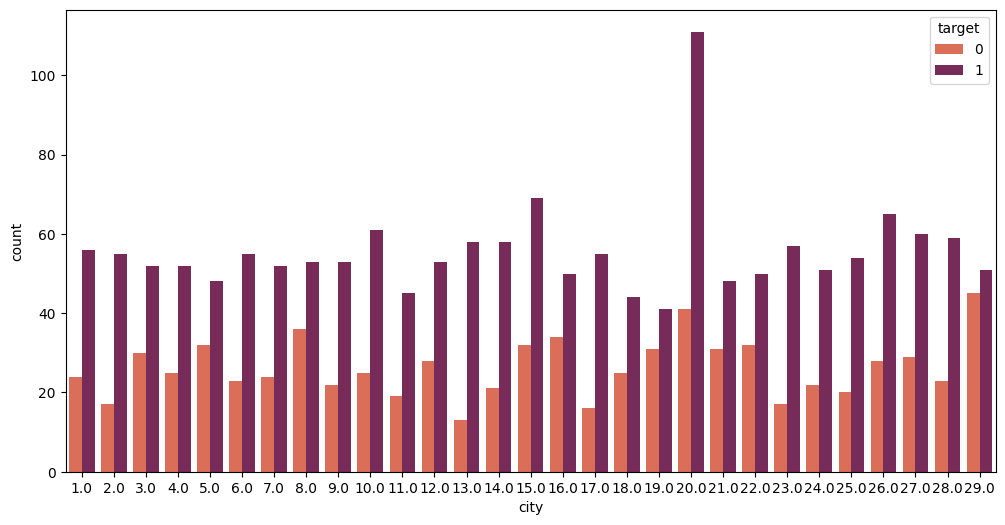

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_driver, x='city', hue='target', palette='rocket_r')

* C20 has Highest Attrition
* C19 has Lowest Attrition

#### Income vs Target

<Axes: xlabel='target', ylabel='Income'>

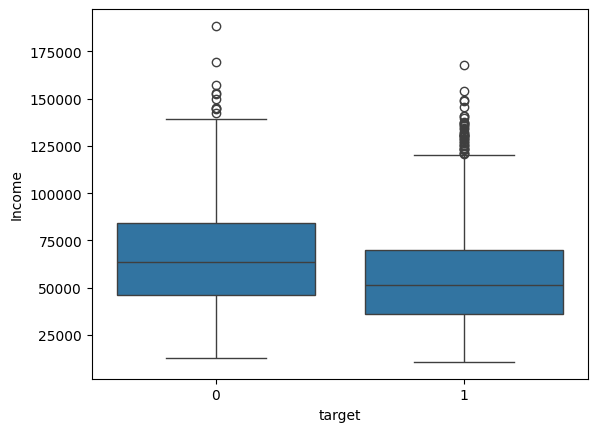

In [50]:
sns.boxplot(data=df_driver, x='target', y='Income')

#### Grade vs Target

<Axes: xlabel='target', ylabel='Grade'>

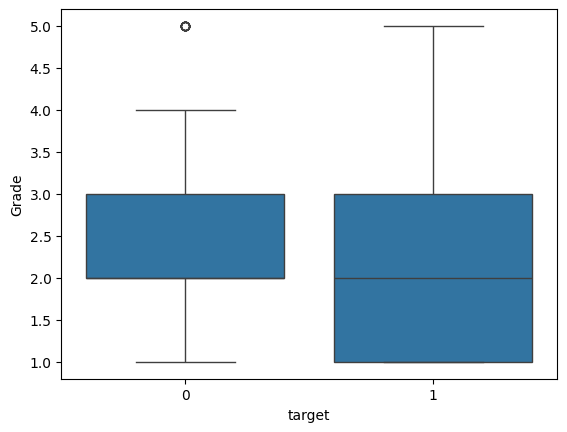

In [51]:
sns.boxplot(data=df_driver, x='target', y='Grade')

#### Age vs Target

<Axes: xlabel='target', ylabel='Age'>

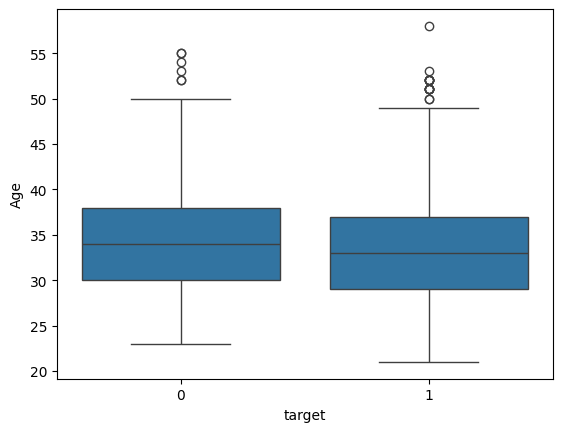

In [52]:
sns.boxplot(data=df_driver, x='target', y='Age')

#### Income vs Total Business Value

<Axes: xlabel='Income', ylabel='Total Business Value'>

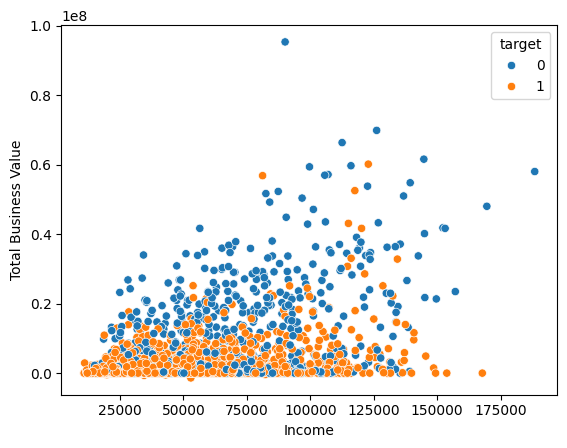

In [53]:
sns.scatterplot(data=df_driver,y='Total Business Value',x='Income',hue='target')

#### Quartely Rating

<Axes: xlabel='Quarterly Rating', ylabel='Count'>

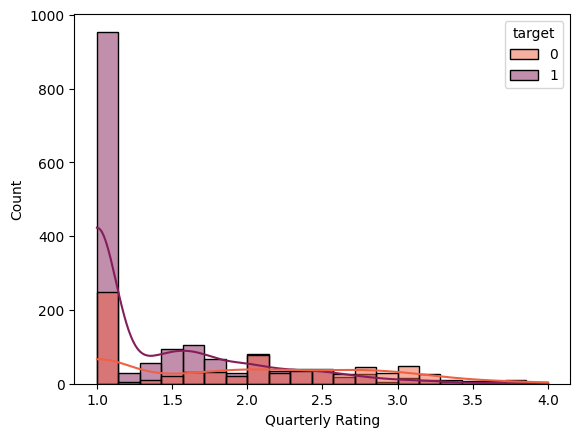

In [54]:
sns.histplot(data=df_driver,x='Quarterly Rating',hue='target',palette='rocket_r',kde=True)

* Drivers with rating less than 2 have left the company
* Drivers with rating greater than 2 have stayed in the company

#### Total Business Value

<Axes: xlabel='target', ylabel='Total Business Value'>

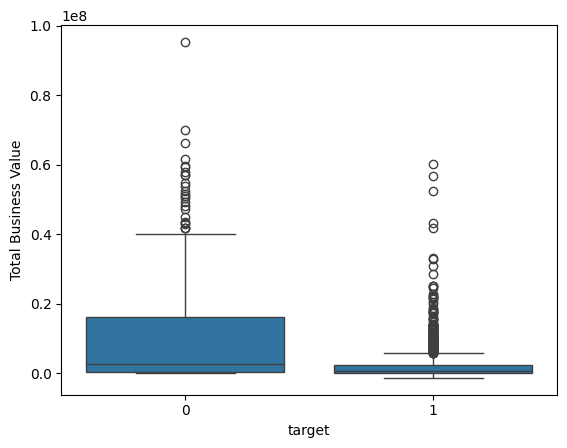

In [55]:
sns.boxplot(data=df_driver,x='target',y='Total Business Value')


 * There are many outliers in TBV values of drivers who have left the company

#### Total Business Value vs Grade

<Axes: xlabel='Grade', ylabel='Total Business Value'>

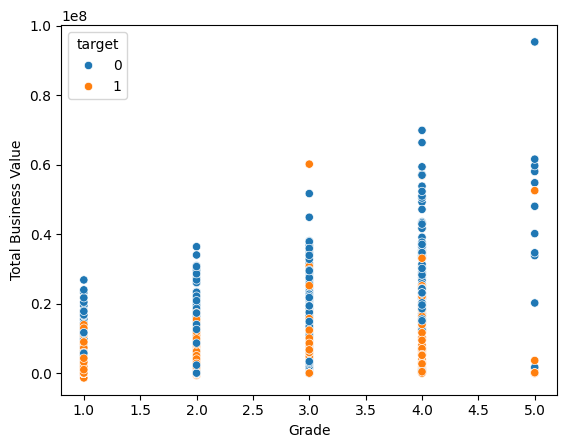

In [56]:
sns.scatterplot(data=df_driver,y='Total Business Value',x='Grade',hue='target')

* TBV increases as the grade of the driver increases

#### Box plot of Quarterly Rating Decreased v/s Total Business Value

<Axes: xlabel='Quarterly_Rating_decreased', ylabel='Total Business Value'>

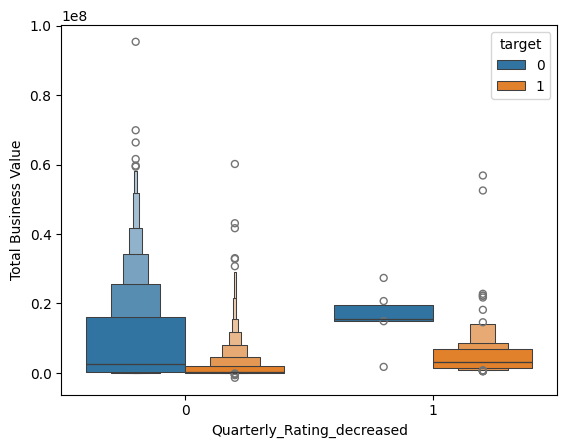

In [57]:
sns.boxenplot(data=df_driver,x='Quarterly_Rating_decreased',y='Total Business Value',hue='target')

* The mean TBV for driver's who's quarterly rating has decreased is higher compared to the drivers who have left the company

In [58]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   float64       
 1   Reporting Date              2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   city                        2381 non-null   float64       
 5   Education_Level             2381 non-null   float64       
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             2381 non-null   float64       
 9   Joining Designation         2381 non-null   float64       
 10  Grade                       2381 non-null   float64       
 11  Total Business Value        2381 non-null   float64     

#### Correlation Plot

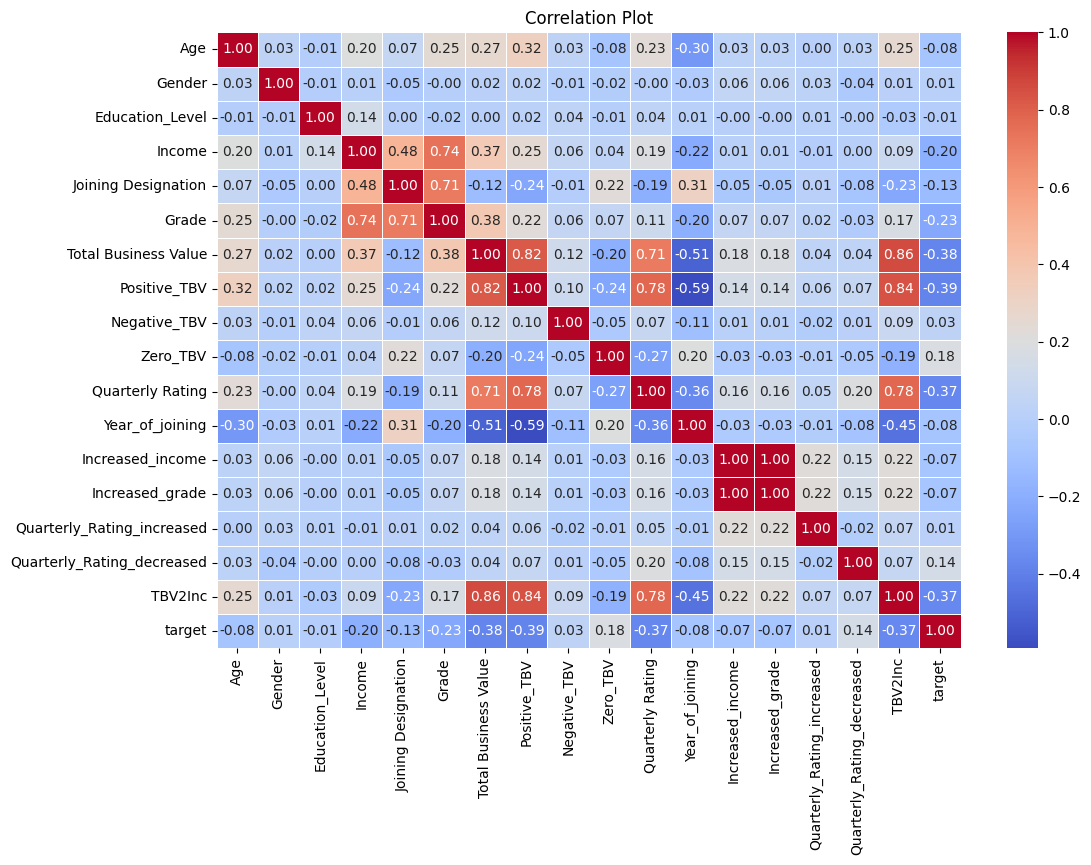

In [59]:
df_num = df_driver.drop(['city', 'Driver_ID', 'Reporting Date', 'Dateofjoining', 'LastWorkingDate'],axis=1)


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

* There is a positive correlation between Income , Joining Designation and Grade
* Quarterly rating is also positively correlated with total business value
* TBV2Inc is positively correlated with Quarterly rating

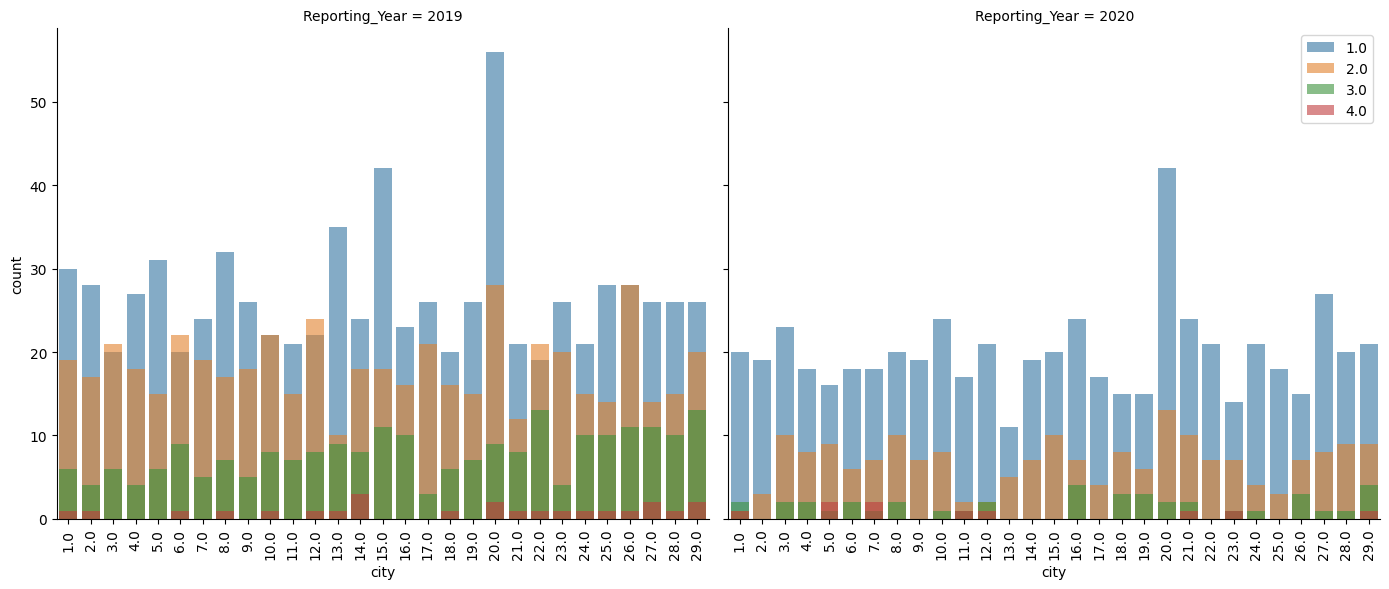

In [60]:
df_driver['Reporting_Year'] = df_driver['Reporting Date'].dt.year
df_driver['QR_round'] = round(df_driver['Quarterly Rating'],0)
g = sns.FacetGrid(df_driver, col='Reporting_Year', hue='QR_round')

# Map a plot type to the FacetGrid
g.map(sns.countplot, 'city', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

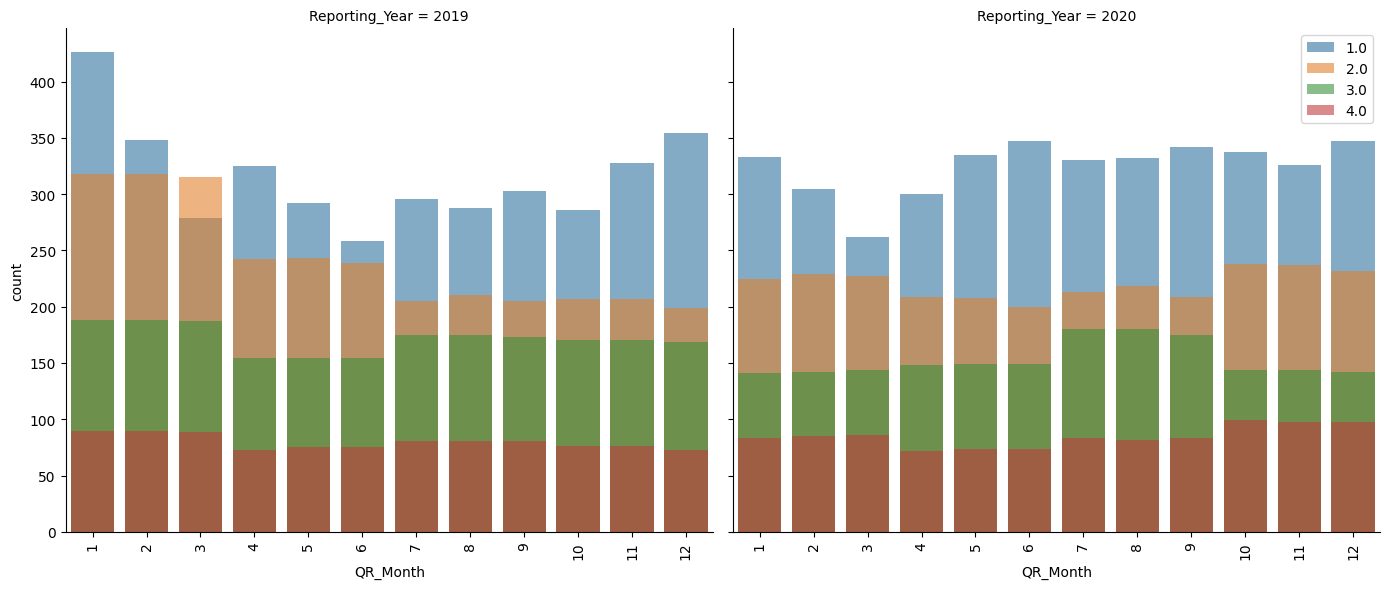

In [61]:
df2['Reporting_Year'] = df2['Reporting Date'].dt.year
df2['QR_Month'] = df2['Reporting Date'].dt.month
df2['QR_round'] = round(df2['Quarterly Rating'],0)
g = sns.FacetGrid(df2, col='Reporting_Year', hue='QR_round')

# Map a plot type to the FacetGrid
g.map(sns.countplot, 'QR_Month', alpha=0.6)

g.set_xticklabels(rotation=90)
g.fig.set_size_inches(14,6)
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

In [62]:
df_driver['Ranking'] =df_driver['Grade']+(df_driver['Joining Designation'])

In [63]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   float64       
 1   Reporting Date              2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   city                        2381 non-null   float64       
 5   Education_Level             2381 non-null   float64       
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             2381 non-null   float64       
 9   Joining Designation         2381 non-null   float64       
 10  Grade                       2381 non-null   float64       
 11  Total Business Value        2381 non-null   float64     

## Data Preporcessing

In [64]:
X=df_driver.drop(['target', 'Reporting Date', 'Dateofjoining', 'LastWorkingDate', 'Education_Level', 'Grade', 'Joining Designation', 'Reporting_Year', 'QR_round', 'Driver_ID'], axis=1)
y=df_driver['target']

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# Saving the column names
cols = X.columns

# Initialize StandardScaler
scale = StandardScaler()

# Standardize the training data
X_scaled = scale.fit_transform(X)

# Convert the standardized data back to a DataFrame with column names
X_scaled = pd.DataFrame(data=X_scaled, columns=cols)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [69]:
y_train.value_counts()

,count
target,
1,1289
0,615


### RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [71]:
rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, criterion='entropy', n_jobs=-1, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')

Train Accuracy: 0.9595588235294118
Validation Accuracy: 0.8805031446540881


**Feature Importance**

In [72]:
for score, name in zip(rf_classifier.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.05 Age
0.01 Gender
0.05 city
0.07 Income
0.12 Total Business Value
0.13 Positive_TBV
0.0 Negative_TBV
0.09 Zero_TBV
0.08 Quarterly Rating
0.25 Year_of_joining
0.0 Increased_income
0.0 Increased_grade
0.0 Quarterly_Rating_increased
0.02 Quarterly_Rating_decreased
0.09 TBV2Inc
0.03 Ranking


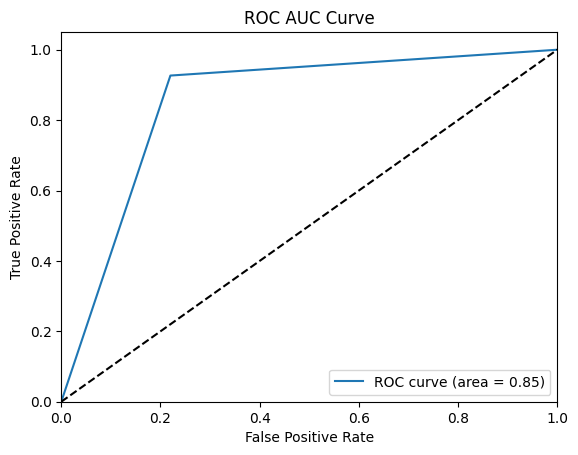

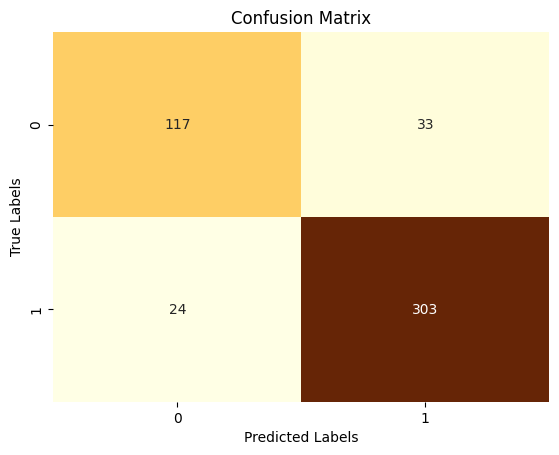


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       150
           1       0.90      0.93      0.91       327

    accuracy                           0.88       477
   macro avg       0.87      0.85      0.86       477
weighted avg       0.88      0.88      0.88       477



In [73]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, pred_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test))

### Gradient Boosting Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.131, random_state=42)

# Fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# Predict the labels for the test set
pred_test_gb = gb_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test_gb)
print("Accuracy:", accuracy)

Accuracy: 0.8784067085953878


In [75]:
print("\n Classification Report:")
print(classification_report(y_test, pred_test_gb))


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.90      0.93      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.85      0.86       477
weighted avg       0.88      0.88      0.88       477



### Light GBM

In [76]:
import lightgbm as lgb

In [77]:
# Define the LightGBM classifier with hyperparameters
lgb_classifier = lgb.LGBMClassifier(n_estimators=150, boosting_type='gbdt', learning_rate=0.02, random_state=42)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = lgb_classifier.predict(X_train)
pred_test_lgbm = lgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test_lgbm, y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 971
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
Train Accuracy: 0.9417016806722689
Validation Accuracy: 0.8784067085953878


In [78]:
print("\n Classification Report:")
print(classification_report(y_test, pred_test_lgbm))


 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       150
           1       0.90      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.85      0.86       477
weighted avg       0.88      0.88      0.88       477



### XGBoost

In [79]:
import xgboost as xgb

In [80]:
xgb_classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.095, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the train and validation set
pred_train = xgb_classifier.predict(X_train)
pred_test_xbg = xgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test_xbg, y_test)}')

Train Accuracy: 0.9390756302521008
Validation Accuracy: 0.8888888888888888


In [81]:
for score, name in zip(xgb_classifier.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.02 Age
0.01 Gender
0.02 city
0.02 Income
0.18 Total Business Value
0.11 Positive_TBV
0.04 Negative_TBV
0.08 Zero_TBV
0.03 Quarterly Rating
0.37 Year_of_joining
0.0 Increased_income
0.0 Increased_grade
0.01 Quarterly_Rating_increased
0.05 Quarterly_Rating_decreased
0.02 TBV2Inc
0.03 Ranking


In [82]:
print("\n Classification Report:")
print(classification_report(y_test, pred_test_xbg))


 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       150
           1       0.91      0.93      0.92       327

    accuracy                           0.89       477
   macro avg       0.87      0.86      0.87       477
weighted avg       0.89      0.89      0.89       477



### Adaptive Boost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

# Instantiate the AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=80, learning_rate=0.84, random_state=42)  # You can specify the number of estimators (weak learners)

# Fit the classifier to the training data
adaboost_clf.fit(X_train, y_train)

# Predict the labels for the test set
pred_test_ada = adaboost_clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test_ada)
print("Accuracy:", accuracy)

Accuracy: 0.8825995807127882


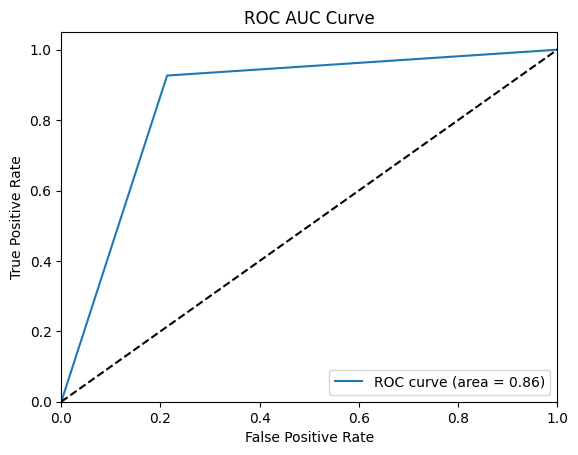

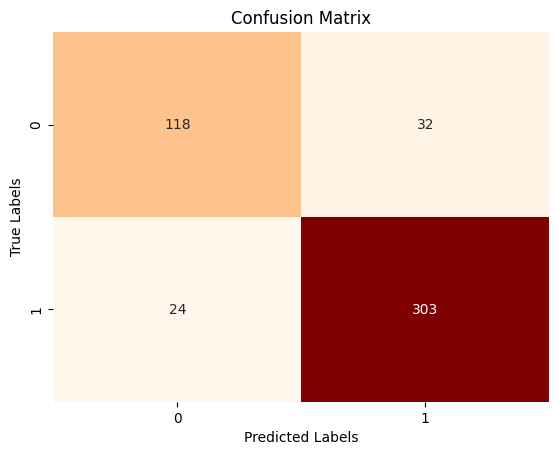


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       150
           1       0.90      0.93      0.92       327

    accuracy                           0.88       477
   macro avg       0.87      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [84]:
roc_auc = roc_auc_score(y_test, pred_test_ada)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test_ada)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(y_test, pred_test_ada)
print()
# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Generate classification report and confusion matrix
print("\n Classification Report:")
print(classification_report(y_test, pred_test_ada))

### Voting Classifier

In [85]:
from sklearn.ensemble import VotingClassifier

In [86]:
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('lgb', lgb_classifier),
        ('ada', adaboost_clf),
        ('gbdt', gb_clf),
        ('xgb', xgb_classifier)
    ],
    voting='hard',
    n_jobs=-1,
    # weights=[1,2,2,1,1]
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Predict on the test set
pred_train = voting_classifier.predict(X_train)
pred_test_vc = voting_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test_vc, y_test)}')

Train Accuracy: 0.9338235294117647
Validation Accuracy: 0.8763102725366876


In [87]:
print("\n Classification Report:")
print(classification_report(y_test, pred_test_vc))


 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       150
           1       0.90      0.93      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.85      0.85       477
weighted avg       0.87      0.88      0.87       477



## **Model Performance Comparison**

All the models Random Forest Classifier, LightGBM, XGBoost, Gradient Boost, Adaptive Boost, and Voting Classifier achieves a score of 85% to 88% for predicting churn

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<style>
  .matching-table {
    width: 100%;
    border-collapse: collapse;
  }
  
  .matching-table th,
  .matching-table td {
    border: 1px solid black;
    padding: 5px;
    text-align: left;
  }
  
  .matching-table th {
    background-color: #f2f2f2;
  }

</style>
</head>
<body>

<table class="matching-table">
  <tr>
    <th>Models</th>
    <th>Accuracy Score</th>
    <th>Precision (0)</th>
    <th>Precision (1)</th>
    <th>Recall (0)</th>
    <th>Recall (1)</th>
    <th>F1 Score (0)</th>
    <th>F1 Score (1)</th>
  </tr>
  <tr>
    <td>RandomForestClassifier</td>
    <td>88%</td>
    <td>83%</td>
    <td>90%</td>
    <td>78%</td>
    <td>93%</td>
    <td>80%</td>
    <td>91%</td>
    
  </tr>
  <tr>
    <td>Gradient Boosting Classifier</td>
    <td>87%</td>
    <td>83%</td>
    <td>90%</td>
    <td>77%</td>
    <td>93%</td>
    <td>80%</td>
    <td>91%</td>
  </tr>
	<tr>
    <td>Light GBM</td>
    <td>88%</td>
    <td>82%</td>
    <td>90%</td>
    <td>78%</td>
    <td>92%</td>
    <td>80%</td>
    <td>91%</td>
  </tr>
  <tr>
    <td>XGBoost </td>
    <td>89%</td>
    <td>84%</td>
    <td>91%</td>
    <td>80%</td>
    <td>93%</td>
    <td>82%</td>
    <td>92%</td>
  </tr>
  <tr>
    <td>Adaptive Bosst</td>
    <td>88%</td>
    <td>83%</td>
    <td>90%</td>
    <td>79%</td>
    <td>93%</td>
    <td>81%</td>
    <td>92%</td>
  </tr>
</table>

</body>
</html>

* **Precision**: The precision measures the proportion of correctly predicted churn cases among all predicted churn cases. It ranges from 78% to 91% for predicting churn, indicating the models' ability to avoid false positives.
* **Recall**: The recall measures the proportion of correctly predicted churn cases among all actual churn cases. It ranges from 73% to 92%, indicating the models' ability to identify actual churn cases.
* **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It ranges from 77% to 91%.
* **ROC AUC**: The ROC AUC (Area Under the Receiver Operating Characteristic Curve) measures the models' ability to distinguish between churn and non-churn instances. It ranges from 82% to 86%, indicating good performance in classifying instances.
* Based on the comparison of performance scores OLA can consider **XGBoost** for churn prediction as it achivevs highest scores across evaluation metrics

 #### **Feature Importances**

**Year_of_joining** (0.37): This feature has the highest importance score, indicating that the year in which the drivers joined the company is the most significant predictor of the target variable.

**Total Business Value** (0.18): Total business value follows closely in importance, suggesting that the overall revenue generated by the drivers is a strong predictor of the target variable.

**Positive_TBV** (0.11):Positive_TBV, indicating the number of instances where total business value is greater than zero for a driver, has the notable importance , indicating the influence on churn prediction.

**Zero_TBV** (0.08): Zero_TBV, indicating the number of instances where total business value is zero for a driver, has a relatively high importance score, implying that this condition is a significant predictor of the target variable.

Increased_income, Increased_grade: These features have zero importance, indicating that they do not significantly contribute to predicting the target variable based on the current model.

## **Insights**

* There is a weak positive correlation (0.23) between  Age and Quarterly Rating.
* The maximum quaterly rating achieved by the drivers is 4.0
* C23 and C3 showed some improvement in terms of quaterly rating over the years
* C20 has Highest Attrition , C19 has Lowest Attrition
* Drivers with rating less than 2 are more likely to leave the company.
* A higher total business value is more likely to be associated with drivers having a higher grade but not vice versa.
* When a driver's Quarterly Rating drops significantly, the Total Business Value also drops significantly for the driver.
* Features that have a strong impact on a driver's Quarterly Rating
  * Response Time
  * Route Efficiency
  * Vehicle Cleanliness and Maintenance
  * Communication Skills
  * Safety and Driving Behavior
  * Personalization and Customer Service
* The driver's performance is not affected by the City they operate in as it can be inferred from the box plot that all the cities share a similar range of Quarterly Rating among it's drivers.

## **Recommendation**:

* Based on the feature importance analysis, OLA may prioritize strategies and interventions aimed at improving total business value, retaining drivers who joined in earlier years, and managing quarterly ratings effectively.
* Maximizing Recall would prioritize identifying all potentially churn-prone drivers, even if it means some false positives occur. This approach aims to minimize the risk of missing drivers who are genuinely at risk of leaving the platform.
* Implement targeted support programs for  drivers with rating less than 2. This could include additional training focused on areas like response time, route efficiency, and customer service, which are known to impact quarterly ratings.
* Set up an early warning system that flags significant rating declines. Proactively engage with these drivers to understand and resolve issues before they result in further performance deterioration or churn.
* Based on the attrition according to the cities identify where churn is more and implement region specific strategies  in the cluster. This could involve revising work conditions, offering better support, or addressing any systemic issues that may be causing dissatisfaction among drivers in this cluster.